In [1]:
# coding: utf-8

# our all
import numpy as np
import pandas as pd

# usefull pandas settings
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# for API working and current time
import requests
import datetime

# chess pgn-reading tool
from pgn_parser import pgn, parser

# multistreaming
import threading

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# own libs
import sys
sys.path.append('//home//roman_vm//my_lib//')

from data_load import *

In [2]:
current_user='Rosolimo'

## Data reaserach

In [3]:
# sample data
get_data("""

SELECT *
FROM chesscom_players
where target_user='{user}'

limit 2

""".format(
    user=current_user
))

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at
0,0,Rosolimo,mdshafiullah,2013-09-16 10:14:36,Live Chess,chess,blitz,300+2,True,0-1,0.0,checkmated,win,w,1378,1478,0.359935,A43,https://www.chess.com/live/game/601973474,https://www.chess.com/openings/Queens-Pawn-Opening-Benoni-Defense,2020-07-19 10:15:13.949415
1,0,Rosolimo,arielpoten,2013-09-16 10:27:01,Live Chess,chess,blitz,300+2,True,1/2-1/2,0.5,stalemate,stalemate,w,1374,1336,0.554469,A40,https://www.chess.com/live/game/601978967,https://www.chess.com/openings/Modern-Defense-with-1-d4-2.c4-Bg7-3.Nc3,2020-07-19 10:15:13.949415


In [4]:
# total games played
get_data("""

SELECT count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , avg(rating) rating
FROM chesscom_players
where target_user='{user}'
""".format(
    user=current_user
))

,games,points,points_per_game,rating
0,12582,6237.0,0.495708,1555.7429661421077730


In [5]:
# game mothly dynamic
dyn=get_data("""

SELECT date_part('year', datime) y, date_part('month', datime) m
        , concat(date_part('year', datime), '-', date_part('month', datime)) period
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by date_part('year', datime), date_part('month', datime)
order by date_part('year', datime), date_part('month', datime)
""".format(
    user=current_user
))

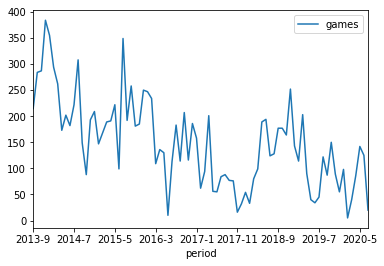

In [6]:
# game mothly dynamic
dyn.set_index('period')[['games']].plot()

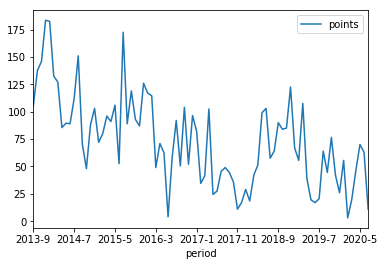

In [7]:
# score mothly dynamic
dyn.set_index('period')[['points']].plot()

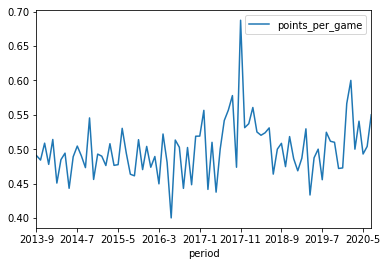

In [8]:
# effectivity mothly dynamic
dyn.set_index('period')[['points_per_game']].plot()

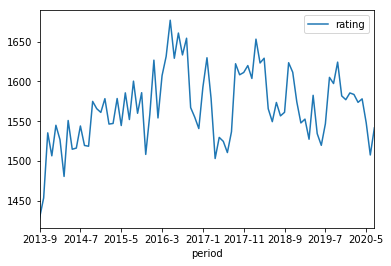

In [9]:
# rating dynamic
dyn.set_index('period')[['rating']].plot()

In [10]:
# effectivity grouped by colors
get_data("""

SELECT color
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by color
""".format(
    user=current_user
))

,color,games,points,points_per_game,rating
0,b,6189,3008.0,0.486024,1557.411860
1,w,6192,3107.5,0.501857,1557.398417


In [11]:
# different game settings
get_data("""
SELECT rules, rated, time_class, time_control
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by rules, rated, time_class, time_control
order by count(distinct game_url) desc

""".format(
    user=current_user
))

,rules,rated,time_class,time_control,games,points,points_per_game,rating
0,chess,True,blitz,300,7302,3564.5,0.488154,1550.874281
1,chess,True,blitz,180+2,4784,2411.5,0.504076,1571.176839
2,chess,True,blitz,600,143,75.5,0.527972,1455.440559
3,chess,False,blitz,600,29,9.0,0.310345,1540.620690
4,chess,False,blitz,180+2,26,7.5,0.288462,1562.423077
5,chess,True,bullet,120+1,17,10.5,0.617647,1503.705882
6,chess960,True,blitz,180,13,7.0,0.538462,1485.461538
7,chess,False,blitz,300+3,10,2.0,0.200000,1652.000000
8,chess,True,blitz,300+2,9,3.5,0.388889,1390.555556
9,chess,True,blitz,180,8,5.5,0.687500,1578.125000


In [12]:
# game end reasons
get_data("""
select *
        , round((games/sum(games) over (partition by score)),2) as share
from 
(
    SELECT score, result_reason, opponent_result_reason
            , count(distinct game_url) games
            , cast(avg(rating) as float) rating
    FROM chesscom_players
    where target_user='{user}'
    and datime>='2000-01-01'
    group by score, result_reason, opponent_result_reason
) t1 
order by score, games desc

""".format(
    user=current_user
))

,score,result_reason,opponent_result_reason,games,rating,share
0,0.0,resigned,win,3924,1554.124108,0.67
1,0.0,checkmated,win,1490,1548.420134,0.26
2,0.0,timeout,win,363,1560.022039,0.06
3,0.0,abandoned,win,60,1562.283333,0.01
4,0.5,insufficient,insufficient,336,1554.580357,0.39
5,0.5,repetition,repetition,229,1559.314410,0.27
6,0.5,agreed,agreed,188,1564.750000,0.22
7,0.5,stalemate,stalemate,84,1551.261905,0.10
8,0.5,timevsinsufficient,timevsinsufficient,16,1659.000000,0.02
9,0.5,50move,50move,4,1559.750000,0.00


In [13]:
# ratings clusters
rdif=get_data("""

    SELECT rating, opponent_rating
            , rating-opponent_rating different
            , count(distinct game_url) games
            , sum(score) points
            , sum(score)/count(distinct game_url) points_per_game
    FROM chesscom_players
    where target_user='{user}'
    and datime>='2000-01-01'
    group by rating, opponent_rating
    order by different
    


""".format(
    user=current_user
))

In [14]:
rdif['cluster']=1000*np.round(rdif['different']/1000,2)

In [15]:
rdif[0:3]

,rating,opponent_rating,different,games,points,points_per_game,cluster
0,1538,2283,-745,7,0.0,0.0,-740.0
1,1564,2288,-724,1,0.0,0.0,-720.0
2,1599,2252,-653,2,0.0,0.0,-650.0


In [16]:
glst=rdif.groupby('cluster').sum()
glst['points_per_game']=glst['points']/glst['games']

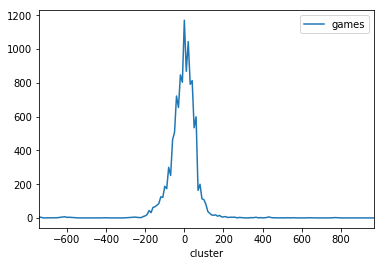

In [17]:
glst[['games']].plot()

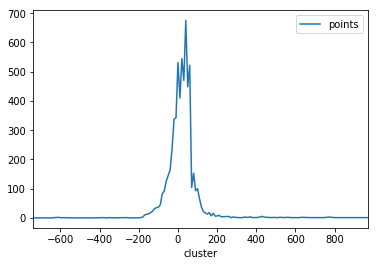

In [18]:
glst[['points']].plot()

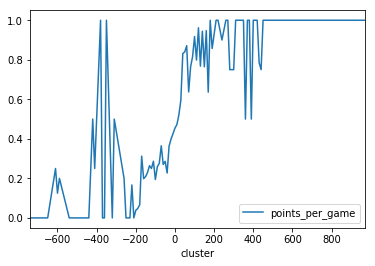

In [19]:
glst[['points_per_game']].plot()

In [20]:
# game starting distrib 
get_data("""
SELECT color, eco, eco_url
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by color, eco, eco_url
having count(distinct game_url)>30
order by count(distinct game_url) desc

""".format(
    user=current_user
))

,color,eco,eco_url,games,points,points_per_game,rating
0,w,D10,https://www.chess.com/openings/Slav-Defense-3.Nc3,472,244.0,0.516949,1559.031780
1,b,B10,https://www.chess.com/openings/Caro-Kann-Defense-2.Nf3-d5,471,253.5,0.538217,1549.027601
2,w,D20,https://www.chess.com/openings/Queens-Gambit-Accepted-Old-Variation,390,234.5,0.601282,1544.661538
3,w,D30,https://www.chess.com/openings/Queens-Gambit-Declined,310,149.5,0.482258,1562.180645
4,b,A45,https://www.chess.com/openings/Indian-Game,294,133.0,0.452381,1555.840136
5,b,B10,https://www.chess.com/openings/Caro-Kann-Defense,214,102.0,0.476636,1549.598131
6,b,C00,https://www.chess.com/openings/French-Defense-Knight-Variation-2...d5,209,107.0,0.511962,1566.899522
7,w,D31,https://www.chess.com/openings/Queens-Gambit-Declined-Semi-Slav-Defense-Accelerated-Move-Order,152,69.5,0.457237,1559.348684
8,w,D30,https://www.chess.com/openings/Queens-Gambit-Declined-3.Nf3-Nf6,134,65.5,0.488806,1562.149254
9,w,D35,https://www.chess.com/openings/Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6,122,68.5,0.561475,1554.795082


In [21]:
# effectivity grouped by start hour
hours=get_data("""

SELECT date_part('hour', datime) h
        , count(distinct game_url) games
        , sum(score) points
        , sum(score)/count(distinct game_url) points_per_game
        , cast(avg(rating) as float) rating
FROM chesscom_players
where target_user='{user}'
and datime>='2000-01-01'
group by date_part('hour', datime)
order by date_part('hour', datime)
""".format(
    user=current_user
))

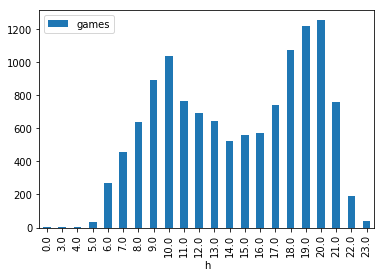

In [22]:
hours.set_index('h')[['games']].plot(kind='bar')

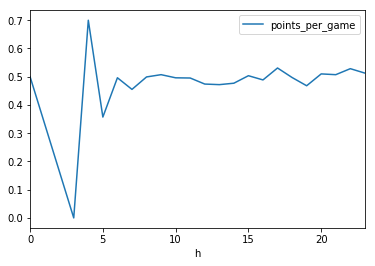

In [23]:
hours.set_index('h')[['points_per_game']].plot()

## Feachure generation

In [24]:
# main dataset
df=get_data("""
SELECT *
FROM chesscom_players
where target_user='{user}'
""".format(
    user=current_user
))
df=df.sort_values(by=['datime'])
df['gamenum']=df.index

df['datime'] = df['datime'].astype('datetime64[ns]')
df['year']=df['datime'].dt.year
df['month']=df['datime'].dt.month
df['week']=df['datime'].dt.week
df['day']=df['datime'].dt.day
df['weekday']=df['datime'].dt.weekday
df['hour']=df['datime'].dt.hour
df['weekend']=np.where((df['weekday']==6)|(df['weekday']==0),1,0)
df['is_night']=np.where((df['hour']>1)&(df['hour']<9),1,0)

In [25]:
len(df)

12582

In [26]:
df.sample(3)

,index,target_user,opponent,datime,event,rules,time_class,time_control,rated,result,score,result_reason,opponent_result_reason,color,rating,opponent_rating,base_elo_forec,eco,game_url,eco_url,inserted_at,gamenum,year,month,week,day,weekday,hour,weekend,is_night
6343,0,Rosolimo,Murad2014,2016-01-12 10:57:37,Live Chess,chess,blitz,300,True,0-1,0.0,resigned,win,w,1619,1698,0.388229,A43,https://www.chess.com/live/game/1420077684,https://www.chess.com/openings/Old-Benoni-Defense-2.d5,2020-07-19 10:18:28.486258,6343,2016,1,2,12,1,10,0,0
4660,0,Rosolimo,Shipwreck1978,2015-05-10 20:34:29,Live Chess,chess,blitz,300,True,1/2-1/2,0.5,repetition,repetition,w,1482,1462,0.528751,A84,https://www.chess.com/live/game/1148153368,https://www.chess.com/openings/Dutch-Defense-2.c4,2020-07-19 10:17:33.984926,4660,2015,5,19,10,6,20,1,0
12271,0,Rosolimo,Gondowe,2020-05-17 13:24:17,Live Chess,chess,bullet,60,True,0-1,0.0,timeout,win,w,1451,1422,0.541638,D30,https://www.chess.com/live/game/4868611164,https://www.chess.com/openings/Queens-Gambit-Declined,2020-07-19 10:21:31.578003,12271,2020,5,20,17,6,13,1,0


In [60]:
wy=df.groupby('weekday').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating':  np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='weekday', ascending=True)
wy['points_per_game']=gy['score']/gy['game_url']

In [61]:
wy

,weekday,game_url,rating,opponent_rating,score,points_per_game
0,0,1477,1556.819228,1561.043331,713.5,0.483074
1,1,1494,1553.852075,1559.288487,733.5,0.490964
2,2,1623,1558.935921,1565.892175,805.0,0.495995
3,3,1822,1541.214599,1524.721186,898.5,0.493139
4,4,1857,1556.577275,1560.764674,898.5,0.483845
5,5,2337,1560.831408,1561.013693,1186.0,0.507488
6,6,1972,1560.348884,1563.301724,1002.0,0.508114


In [56]:
wey=df.groupby('weekend').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating':  np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='weekend', ascending=True)
wey['points_per_game']=gy['score']/gy['game_url']

In [57]:
wey

,weekend,game_url,rating,opponent_rating,score,points_per_game
0,0,9133,1554.574401,1554.307566,4521.5,0.483074
1,1,3449,1558.837344,1562.334590,1715.5,0.490964


In [58]:
ni=df.groupby('is_night').agg(
                {
                    'game_url': lambda x: x.nunique(),
                    'score': np.sum,
                    'rating': np.mean,
                    'opponent_rating': np.mean,
                }).reset_index().sort_values(by='is_night', ascending=True)
ni['points_per_game']=gy['score']/gy['game_url']

In [59]:
ni

,is_night,game_url,rating,opponent_rating,score,points_per_game
0,0,11173,1555.273338,1554.894388,5559.0,0.483074
1,1,1409,1559.466998,1569.303052,678.0,0.490964


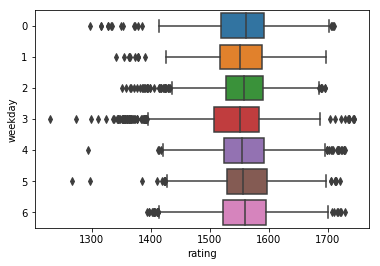

In [66]:
sns.boxplot(y="weekday", x="rating", data=df, orient="h")

In [27]:
# elo-functions
def elo_prob(ra, rb):
    return 1/(1+np.power(10, (rb-ra)/400))

def own_elo(ra, rb, score, K):
    return ra+K*(score-elo_prob(ra, rb))

# elo logic chesking
df['own_elo']=1200
df['K']=np.where(df['gamenum']<30,30,5)
df['own_elo']=np.round(df[['rating', 'opponent_rating', 'score', 'K']].apply(lambda x: own_elo(*x), axis=1),0)

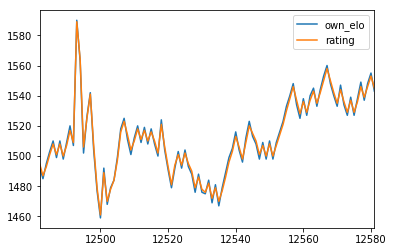

In [28]:
df[['own_elo', 'rating']][-100:].plot()

## Machine learning

In [ ]:
f_list=['date', 'time', 'color', 'score', 'rating', 'opponent_rating', 'eco']

In [25]:
work_df=df[df['rated']==True]
work_df=work_df[f_list]
work_df['datetime']=work_df['date']+' '+work_df['time']



c=pd.get_dummies(work_df['color'])
eco=pd.get_dummies(work_df['eco'])
work_df=pd.concat([work_df, c, eco], axis=1)




work_df=work_df.drop(columns=['time', 'datetime', 'color', 'eco'])

In [26]:
len(work_df)

11433

In [27]:
work_df.sample(3)

,date,score,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown
10717,2018-12-22,1.0,1532,1529,2018,12,51,22,5,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2667,2014-06-21,1.0,1514,1468,2014,6,25,21,5,17,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5579,2015-09-16,1.0,1591,1547,2015,9,38,16,2,7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
hold=work_df[work_df['date']>='2019-08-01']
X=work_df[work_df['date']<'2019-08-01']
y=X['score']
X=X.drop(columns=['score', 'date'])

X=X.astype('int')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X.values, y.values, test_size=0.25, random_state=42)

In [51]:
X.sample(3)

,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown
1455,1527,1561,2014,1,3,17,4,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6338,1667,1700,2016,1,1,4,0,8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1409,1555,1531,2014,1,3,14,1,17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train.shape

(8539, 203)

In [53]:
X_test.shape

(2847, 203)

In [54]:
# строит график, считает метрики
def check(df, x, y1, y2, title):
    from sklearn.metrics import mean_squared_error
    print(title)
    df[[x, y1, y2]].set_index(x).plot(title=title)
    
    print('correlation: ', np.corrcoef(df[y1], df[y2])[0][1])
    
    print('stdev: ', mean_squared_error(df[y1], df[y2]))

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_pred=lr.predict(X_test)

print('R^2 train:', lr.score(X_train, y_train))
print('R^2 test:', lr.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(lr.predict(X_test)))
print('MAE train', mean_absolute_error(lr.predict(X_train), y_train))
print('MAE test', mean_absolute_error(lr.predict(X_test), y_test))

# plt.plot(range(len(y_test)), y_test, lr.predict(X_test))

R^2 train: 0.15306268817983282
R^2 test: -574032251868237.2
Total:  1393.0
Total:  -2096561421.0489693
MAE train 0.409590727273021
MAE test 736411.6523407875


In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

lr_pred=lr.predict(X_test)

print('R^2 train:', lr.score(X_train, y_train))
print('R^2 test:', lr.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(lr.predict(X_test)))
print('MAE train', mean_absolute_error(lr.predict(X_train), y_train))
print('MAE test', mean_absolute_error(lr.predict(X_test), y_test))

# plt.plot(range(len(y_test)), y_test, lr.predict(X_test))

ValueError: Unknown label type: 'continuous'

In [86]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
print('R^2 train:', xgb.score(X_train, y_train))
print('R^2 test:', xgb.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(xgb.predict(X_test)))
print('MAE train', mean_absolute_error(xgb.predict(X_train), y_train))
print('MAE test', mean_absolute_error(xgb.predict(X_test), y_test))

[23:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 train: 0.22149439754449451
R^2 test: 0.19009682492446356
Total:  1393.0
Total:  1381.0457
MAE train 0.38845559006022656
MAE test 0.3954739360316075


In [ ]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(1,151)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(np.arange(1,151), columns=['n_estimators']).set_index('n_estimators')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_n_estimators=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_n_estimators=stat_best_n_estimators

In [105]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(0.05, 0.65, 0.05)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(rng, columns=['learning_rate']).set_index('learning_rate')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_learning_rate=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_learning_rate=0.15

[00:06:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

ValueError: Length of values does not match length of index

[00:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

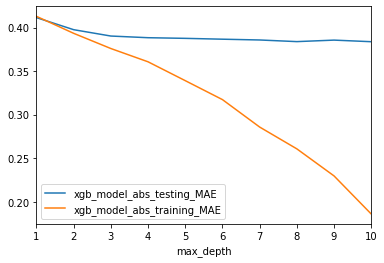

In [117]:
xgb_model_abs_testing = list()
xgb_model_abs_training = list()
rng = np.arange(1, 11)
for i in rng:
    xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=ch_learning_rate, max_depth=i)
    xgb.fit(X_train, y_train)
    xgb.score(X_test, y_test)
    xgb_model_abs_testing.append(mean_absolute_error(xgb.predict(X_test), y_test))
    xgb_model_abs_training.append(mean_absolute_error(xgb.predict(X_train), y_train))
    
find_df=pd.DataFrame(rng, columns=['max_depth']).set_index('max_depth')
find_df['xgb_model_abs_testing_MAE']=xgb_model_abs_testing
find_df['xgb_model_abs_training_MAE']=xgb_model_abs_training

find_df.plot()

stat_best_max_depth=np.argmin(find_df['xgb_model_abs_testing_MAE'])
ch_max_depth=2

In [120]:
ch_max_depth=2

In [122]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
xgb = xgboost.XGBRegressor(n_estimators=ch_n_estimators, random_state=17, learning_rate=ch_learning_rate, max_depth=ch_max_depth)
xgb.fit(X_train, y_train)
print('R^2 train:', xgb.score(X_train, y_train))
print('R^2 test:', xgb.score(X_test, y_test))
print('Total: ', np.sum(y_test))
print('Total: ', np.sum(xgb.predict(X_test)))
print('MAE train', mean_absolute_error(xgb.predict(X_train), y_train))
print('MAE test', mean_absolute_error(xgb.predict(X_test), y_test))

[00:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 train: 0.20717127832527393
R^2 test: 0.18509732844815197
Total:  1393.0
Total:  1381.5818
MAE train 0.39347833822546663
MAE test 0.3976592982929131


In [123]:
res_test=pd.DataFrame(X_test, columns=X.columns)
res_test['fact']=y_test
res_test['predict']=xgb.predict(X_test)


sh=res_test.sample(150).reset_index()
sh['ind']=sh.index

In [124]:
res_test.sample(3)

,rating,opponent_rating,year,month,week,day,weekday,hour,weekend,is_night,b,w,A00,A01,A02,A03,A04,A06,A07,A08,A09,A10,A11,A13,A15,A16,A17,A20,A21,A22,A25,A28,A30,A31,A32,A33,A34,A35,A36,A40,A41,A42,A43,A44,A45,A46,A48,A49,A50,A51,A52,A53,A54,A56,A57,A58,A60,A65,A70,A80,A84,A85,B00,B01,B02,B03,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B30,B33,B34,B40,B44,B45,B50,B52,B54,C00,C01,C02,C08,C10,C11,C14,C15,C20,C26,C31,C34,C41,C42,C44,C46,C61,C62,C63,C64,C66,C70,C77,D00,D01,D02,D03,D04,D06,D07,D08,D10,D11,D13,D15,D16,D20,D21,D30,D31,D32,D35,D37,D38,D40,D41,D43,D44,D45,D46,D48,D50,D51,D52,D53,D55,D60,D70,D72,D73,D77,D78,D80,D81,D82,D83,D84,D85,D86,D87,D90,D91,D92,D93,D94,D95,D96,D97,D98,E00,E10,E11,E12,E14,E15,E16,E17,E18,E19,E20,E21,E32,E33,E34,E38,E40,E41,E43,E60,E61,E62,E70,E76,E80,E90,E91,E92,E93,E94,Unknown,fact,predict
668,1631,1591,2016,1,4,29,4,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.612712
1393,1629,1671,2018,12,49,9,6,9,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.385143
1887,1507,1484,2014,8,33,16,5,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.653419


gg
correlation:  0.3235967243189679
stdev:  0.20347846086309718


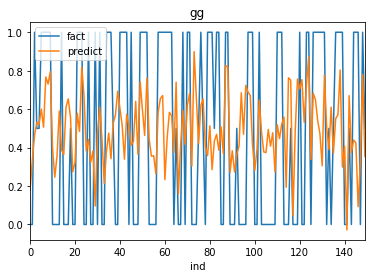

In [125]:
check(sh, 'ind', 'fact', 'predict', 'gg')

In [126]:
features_df = pd.DataFrame(data=xgb.feature_importances_.reshape(1, -1), columns=X.columns).sort_values(axis=1, by=[0], ascending=False).T

In [127]:
features_df

,0
opponent_rating,0.174251
rating,0.156435
E61,0.036569
year,0.027160
week,0.022224
E10,0.021495
B15,0.020792
hour,0.020759
B22,0.020501
month,0.019782


In [131]:
res_test.groupby('month').mean()[['fact']]

,fact
month,
1,0.525455
2,0.469027
3,0.470833
4,0.508969
5,0.535211
6,0.478873
7,0.460648
8,0.470954
9,0.474074


In [133]:
res_test.groupby('hour').mean()[['fact']]

,fact
hour,
0,0.500000
4,0.500000
5,0.000000
6,0.451613
7,0.494898
8,0.462687
9,0.549107
10,0.548837
11,0.524242
